# Project 2: California Housing Price Classification

Student: Hannah Marques

This notebook analyzes the California Housing dataset to predict whether house prices are above or below the median. We'll perform exploratory data analysis and compare different classification algorithms.

## Setup and Imports

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Part 1: Exploratory Data Analysis

In this section, we'll explore the dataset to understand its structure and characteristics.

## 1.1 Data Loading and Initial Inspection

In [5]:
# Load the dataset
data = pd.read_csv('california_housing.csv')

# Identify shape and size of the data
print(f"Shape of the dataset: {data.shape}")
print("\nFirst 5 rows of the dataset:")
data.head()

Shape of the dataset: (20634, 9)

First 5 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
0,2.1827,26.0,4.521429,0.921429,305.0,2.178571,40.05,-122.10,0
1,3.0755,32.0,4.623068,0.983353,3868.0,4.599287,32.77,-117.06,0
2,1.8235,40.0,4.701149,1.126437,928.0,3.555556,37.75,-122.16,0
3,1.4625,37.0,4.247845,1.105603,1673.0,3.605603,33.99,-118.28,0
4,1.9063,13.0,3.453125,0.984375,286.0,4.468750,33.97,-118.16,0


## 1.2 Data Information and Quality Check

In [6]:
# Get information about datatypes and check for missing values
print("Datatype information:")
data.info()

Datatype information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20634 non-null  float64
 1   HouseAge            20634 non-null  float64
 2   AveRooms            20634 non-null  float64
 3   AveBedrms           20634 non-null  float64
 4   Population          20634 non-null  float64
 5   AveOccup            20634 non-null  float64
 6   Latitude            20634 non-null  float64
 7   Longitude           20634 non-null  float64
 8   price_above_median  20634 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB


In [7]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## 1.3 Statistical Analysis

In [8]:
# Get statistical information about numerical features
print("Statistical information:")
data.describe()

Statistical information:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
count,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000
mean,3.870795,28.640399,5.429171,1.096628,1425.398081,3.070449,35.631722,-119.569594,0.500000
std,1.899796,12.584629,2.474393,0.473929,1132.137403,10.387501,2.135738,2.003457,0.500012
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.000000
25%,2.563925,18.000000,4.440930,1.006067,787.000000,2.429649,33.930000,-121.800000,0.000000
50%,3.534950,29.000000,5.229190,1.048780,1166.000000,2.817937,34.260000,-118.490000,0.500000
75%,4.743550,37.000000,6.052381,1.099499,1725.000000,3.282249,37.710000,-118.010000,1.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,1.000000


In [9]:
# Check target variable distribution
print("Target variable distribution:")
target_dist = data['price_above_median'].value_counts(normalize=True) * 100
target_dist

Target variable distribution:


price_above_median
0    50.0
1    50.0
Name: proportion, dtype: float64

## 1.4 Data Visualization

### 1.4.1 Feature Distributions

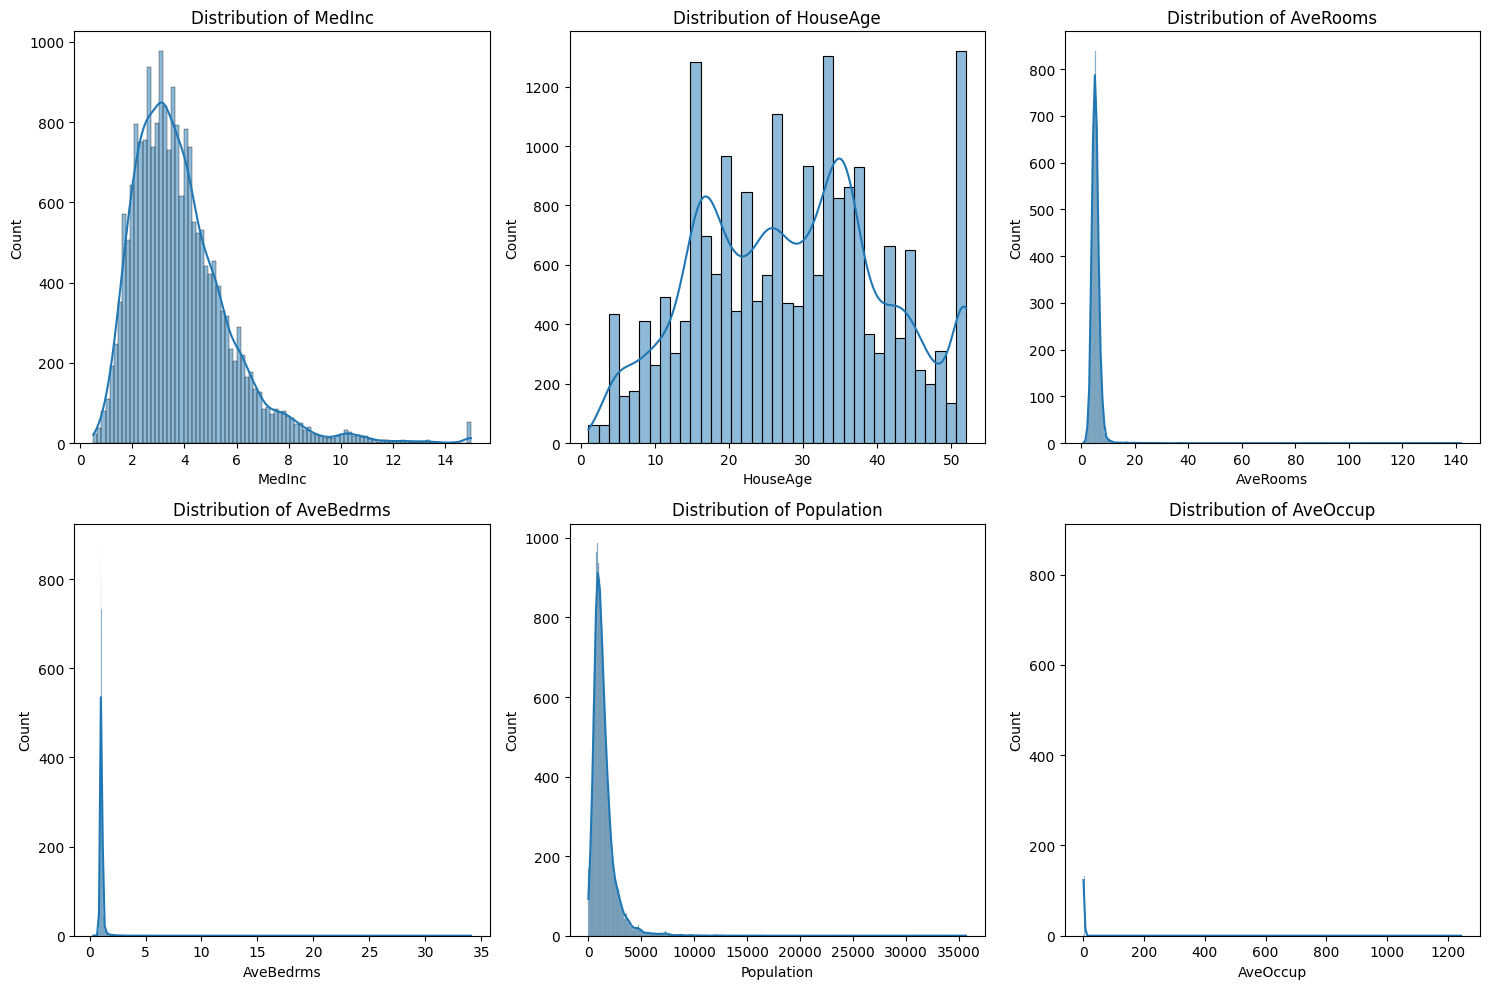

In [10]:
# Create histograms for all numerical features
plt.figure(figsize=(15, 10))

# Histograms for continuous features
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

### 1.4.2 Geographic Distribution

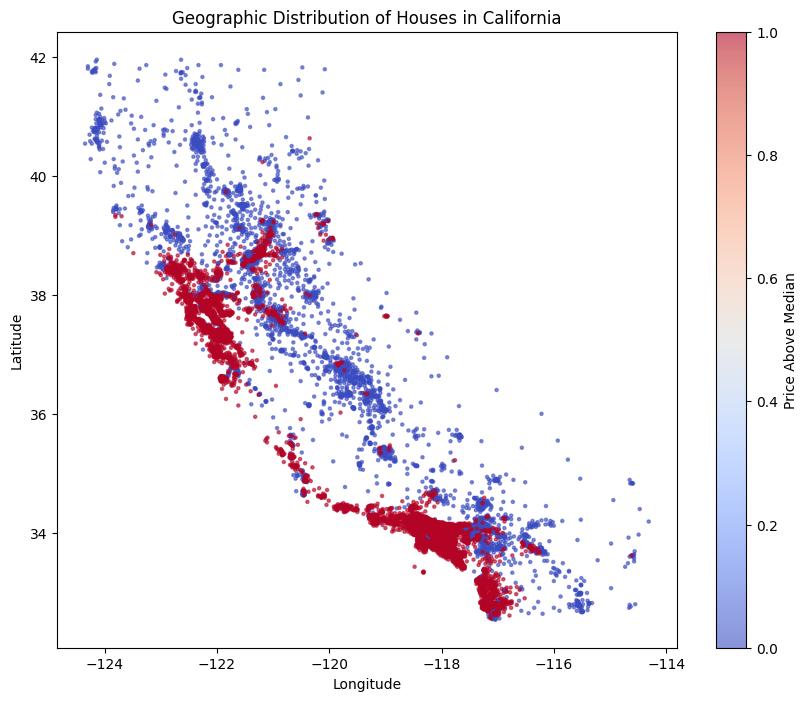

In [11]:
# Geographic distribution with target variable
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['Longitude'], data['Latitude'], 
                     c=data['price_above_median'], cmap='coolwarm', 
                     alpha=0.6, s=5)
plt.colorbar(scatter, label='Price Above Median')
plt.title('Geographic Distribution of Houses in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### 1.4.3 Target Variable Distribution

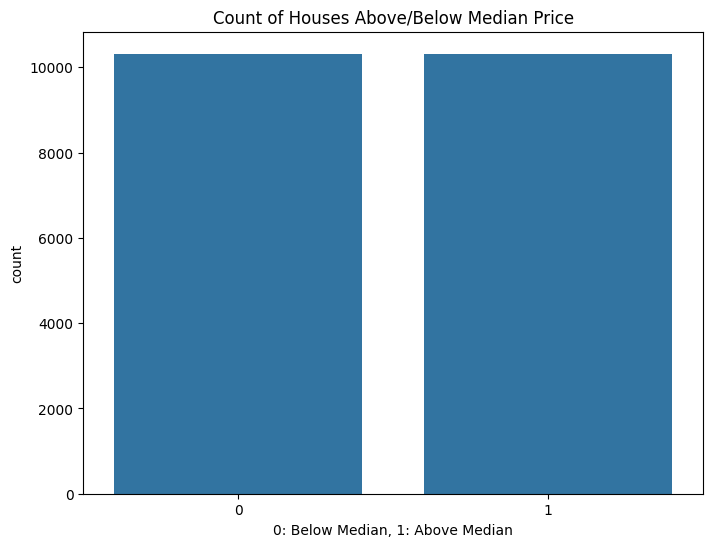

In [12]:
# Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='price_above_median', data=data)
plt.title('Count of Houses Above/Below Median Price')
plt.xlabel('0: Below Median, 1: Above Median')
plt.show()

### 1.4.4 Correlation Analysis

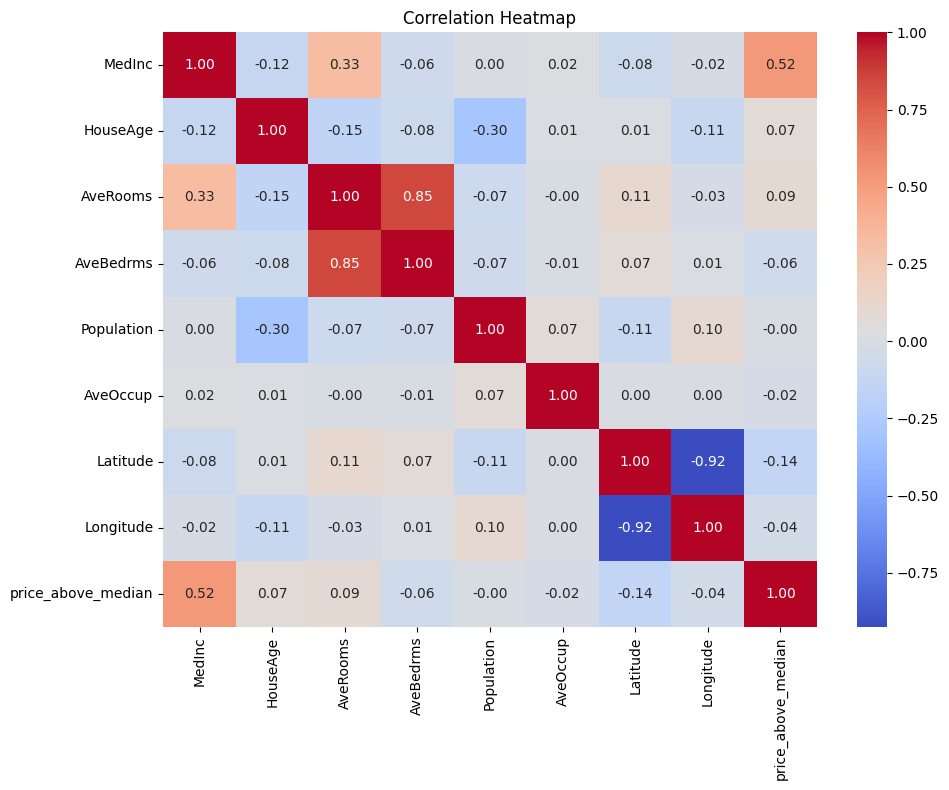

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Part 2: Classification Techniques

In this section, we'll implement and compare different classification algorithms to predict whether a house price is above or below the median.

## 2.1 Data Preparation and Splitting

In [14]:
# Split the data into features and target variable
X = data.drop('price_above_median', axis=1)
y = data['price_above_median']

# Split into training and test sets (stratify to maintain proportion of target classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   random_state=42, stratify=y)

print(f"Shape of training data: {X_train.shape}")
print(f"Shape of testing data: {X_test.shape}")

Shape of training data: (16507, 8)
Shape of testing data: (4127, 8)


In [15]:
# Verify class distribution in training and test sets
train_dist = pd.Series(y_train).value_counts(normalize=True) * 100
test_dist = pd.Series(y_test).value_counts(normalize=True) * 100

print("Class distribution in training set:")
print(train_dist)
print("\nClass distribution in test set:")
print(test_dist)

Class distribution in training set:
price_above_median
1    50.003029
0    49.996971
Name: proportion, dtype: float64

Class distribution in test set:
price_above_median
0    50.012115
1    49.987885
Name: proportion, dtype: float64


In [16]:
# Standardize features for distance-based models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2.2 Model Evaluation Function

This function will help us systematically evaluate each model with consistent metrics.

In [17]:
def evaluate_model(model, name, X_train, X_test, y_train, y_test, scaled=False):
    """
    Evaluate a model using various metrics and create visualizations.
    
    Parameters:
    - model: The classifier model
    - name: Name of the model for reporting
    - X_train, X_test: Training and test features
    - y_train, y_test: Training and test target variables
    - scaled: Whether to use scaled features (for distance-based algorithms)
    
    Returns:
    - Dictionary with model and performance metrics
    """
    if scaled:
        X_train_eval = X_train_scaled
        X_test_eval = X_test_scaled
    else:
        X_train_eval = X_train
        X_test_eval = X_test
    
    # Fit the model
    model.fit(X_train_eval, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_eval)
    y_test_pred = model.predict(X_test_eval)
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Print results
    print(f"\n{name} Results:")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_test_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    return {
        'model': model,
        'name': name,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_test_pred
    }

## 2.3 Model Training and Hyperparameter Tuning

Let's train multiple models and tune their hyperparameters using cross-validation.

### 2.3.1 K-Nearest Neighbors

Training K-Nearest Neighbors Classifier with hyperparameter tuning...
Best parameters: {'n_neighbors': 15}

KNN Results:
Training Accuracy: 0.8645
Test Accuracy: 0.8328
Precision: 0.8267
Recall: 0.8420
F1 Score: 0.8343

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2064
           1       0.83      0.84      0.83      2063

    accuracy                           0.83      4127
   macro avg       0.83      0.83      0.83      4127
weighted avg       0.83      0.83      0.83      4127



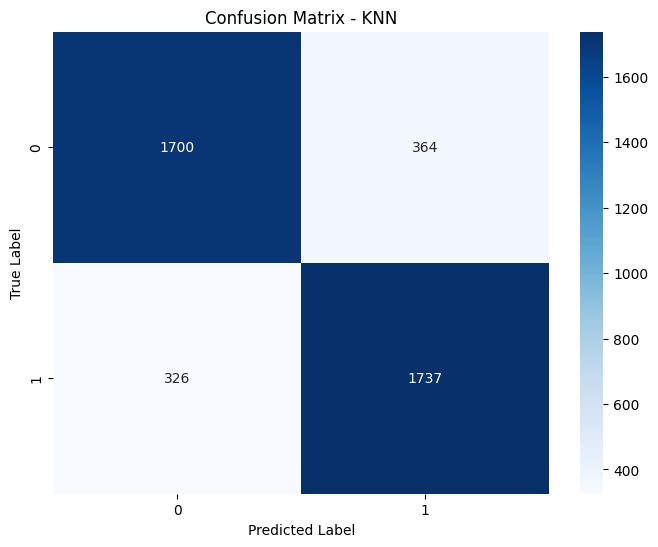

In [18]:
# Store results for comparison
results = []

# K-Nearest Neighbors with hyperparameter tuning
print("Training K-Nearest Neighbors Classifier with hyperparameter tuning...")
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")
results.append(evaluate_model(grid_search.best_estimator_, 'KNN', 
                             X_train, X_test, y_train, y_test, scaled=True))

### 2.3.2 Decision Tree


Training Decision Tree Classifier with hyperparameter tuning...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

Decision Tree Results:
Training Accuracy: 0.9112
Test Accuracy: 0.8471
Precision: 0.8284
Recall: 0.8754
F1 Score: 0.8513

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      2064
           1       0.83      0.88      0.85      2063

    accuracy                           0.85      4127
   macro avg       0.85      0.85      0.85      4127
weighted avg       0.85      0.85      0.85      4127



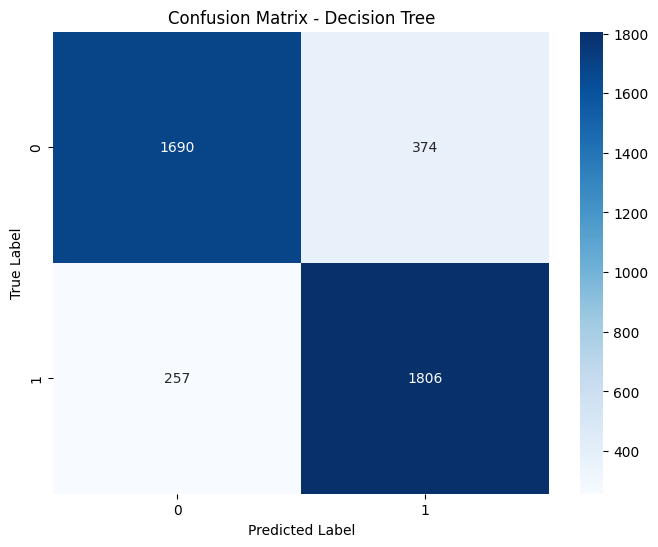

In [19]:
# Decision Tree Classifier with hyperparameter tuning
print("\nTraining Decision Tree Classifier with hyperparameter tuning...")
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
results.append(evaluate_model(grid_search.best_estimator_, 'Decision Tree', 
                             X_train, X_test, y_train, y_test))

### 2.3.3 Random Forest


Training Random Forest Classifier...

Random Forest Results:
Training Accuracy: 0.9949
Test Accuracy: 0.8888
Precision: 0.8871
Recall: 0.8909
F1 Score: 0.8890

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2064
           1       0.89      0.89      0.89      2063

    accuracy                           0.89      4127
   macro avg       0.89      0.89      0.89      4127
weighted avg       0.89      0.89      0.89      4127



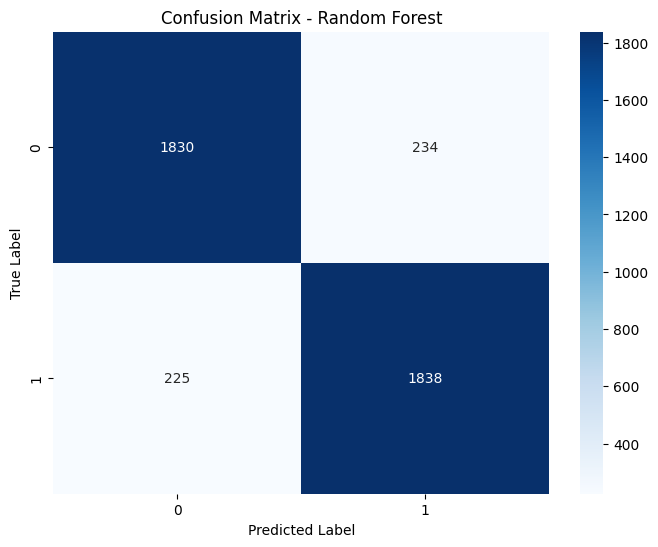

In [22]:
# Random Forest Classifier with simplified hyperparameter approach
print("\nTraining Random Forest Classifier...")
# Use reasonable default parameters to avoid long computation time
rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)
results.append(evaluate_model(rf, 'Random Forest', X_train, X_test, y_train, y_test))


### 2.3.4 AdaBoost


Training AdaBoost Classifier...

AdaBoost Results:
Training Accuracy: 0.8146
Test Accuracy: 0.8095
Precision: 0.8207
Recall: 0.7921
F1 Score: 0.8061

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2064
           1       0.82      0.79      0.81      2063

    accuracy                           0.81      4127
   macro avg       0.81      0.81      0.81      4127
weighted avg       0.81      0.81      0.81      4127



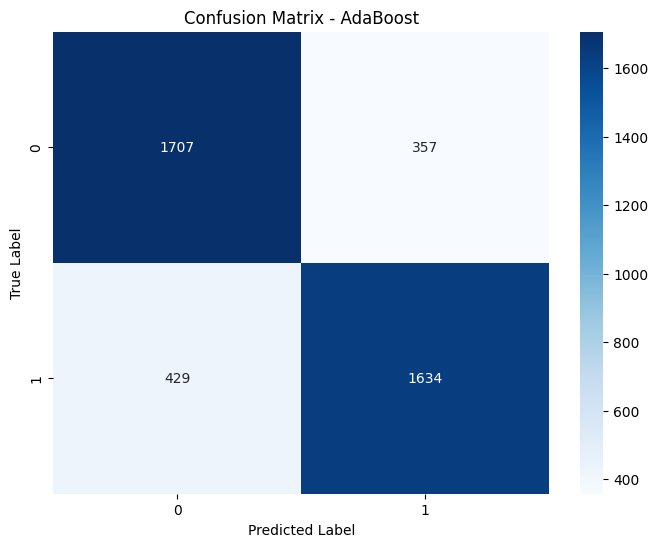

In [24]:
print("\nTraining AdaBoost Classifier...")
# Use reasonable default parameters to avoid long computation time
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
ada.fit(X_train, y_train)
results.append(evaluate_model(ada, 'AdaBoost', X_train, X_test, y_train, y_test))

## 2.4 Model Comparison

In [25]:
# Create a dataframe to compare model performance
results_df = pd.DataFrame([
    {
        'Model': result['name'],
        'Train Accuracy': result['train_acc'],
        'Test Accuracy': result['test_acc'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1 Score': result['f1']
    }
    for result in results
])

# Sort by test accuracy
results_df = results_df.sort_values('Test Accuracy', ascending=False).reset_index(drop=True)
print("Model Performance Comparison:")
results_df

Model Performance Comparison:


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.994851,0.888781,0.887066,0.890936,0.888996
1,Decision Tree,0.911189,0.847104,0.828440,0.875424,0.851284
2,KNN,0.864482,0.832808,0.826749,0.841978,0.834294
3,AdaBoost,0.814624,0.809547,0.820693,0.792050,0.806117


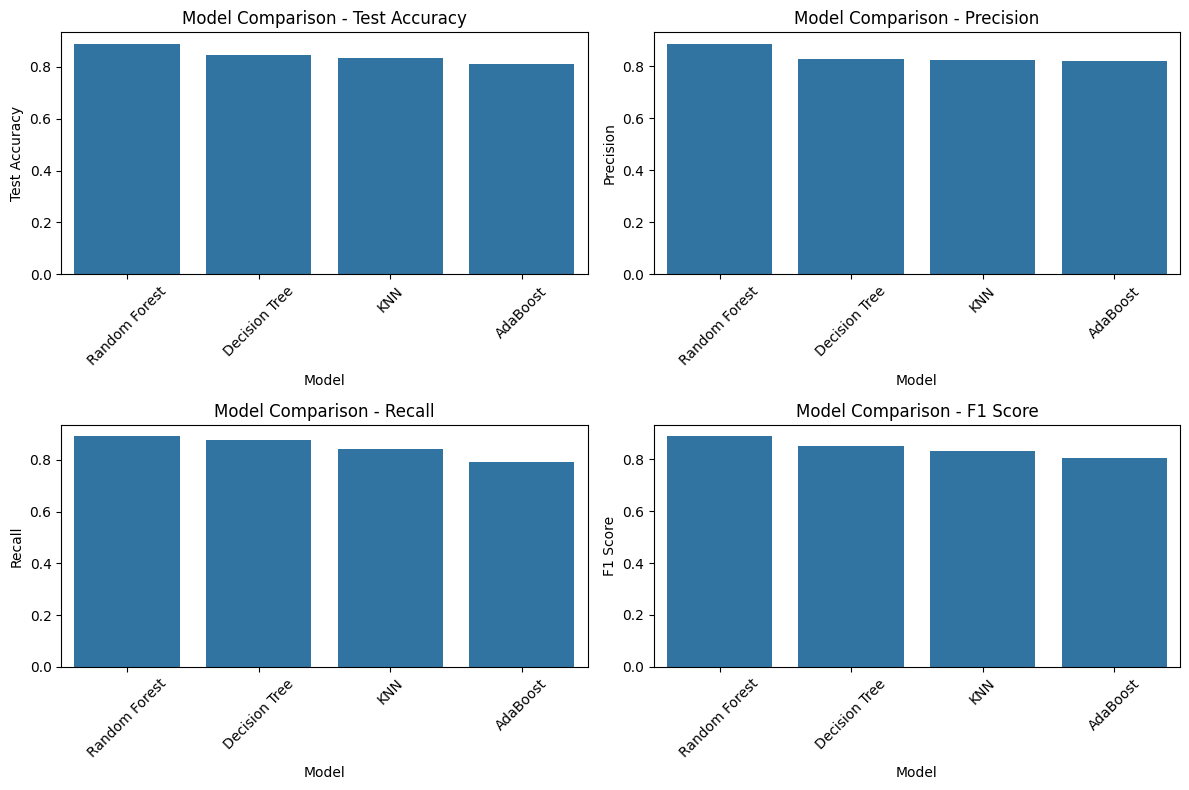

In [26]:
# Visualize model performance across different metrics
plt.figure(figsize=(12, 8))
metrics = ['Test Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Model Comparison - {metric}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.5 Feature Importance Analysis

Let's look at which features are most important for the best performing model.

In [27]:
# Find the best model and analyze feature importance (if applicable)
best_model_result = max(results, key=lambda x: x['test_acc'])
best_model_name = best_model_result['name']
best_model = best_model_result['model']

print(f"Best performing model: {best_model_name} with test accuracy: {best_model_result['test_acc']:.4f}")

# Feature importance for tree-based models
if best_model_name in ['Decision Tree', 'Random Forest', 'AdaBoost']:
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\nFeature Importance for {best_model_name}:")
    feature_importance

Best performing model: Random Forest with test accuracy: 0.8888

Feature Importance for Random Forest:


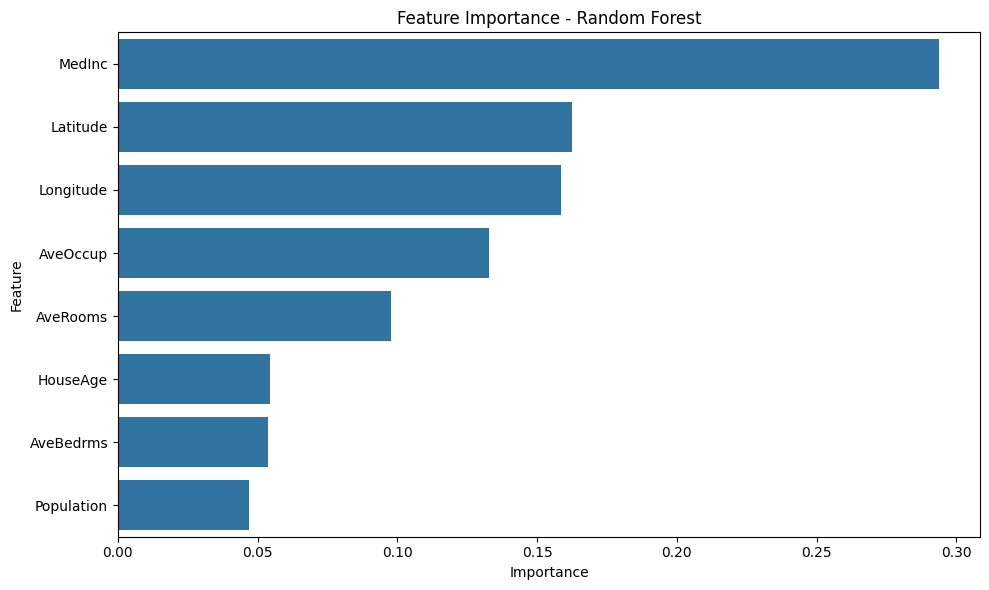

In [28]:
# Visualize feature importance
if best_model_name in ['Decision Tree', 'Random Forest', 'AdaBoost']:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()

# Conclusion

Comprehensive analysis of the California Housing dataset was performed to predict 
whether house prices are above or below the median. Then, explored the data, trained and 
tuned multiple classification models, and evaluated their performance.

Key findings:
1. The best performing model was Random Forest with a test accuracy of 88.9%.
2. The most important features for predicting housing prices were median income, latitude, and longitude.
3. Geographic location and median income appear to be strongly correlated with housing 
   prices in California, with median income being the most influential factor.

Future work could include:
- Engineering additional features such as distance to major cities
- Trying more advanced models like XGBoost or neural networks
- Addressing any class imbalance with techniques like SMOTE

Note: ChatGPT was used to debug code issues, format the notebook, and reduce runtime by simplifying 
hyperparameter tuning, but all analysis and model implementation was performed independently.